In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1998-01-31 00:00:00,0.131980,#VALUE!,#VALUE!,0.405000,0.660023,0.671127,0.708245,0.624016,0.706001,0.000000,0.561522,0.173089,0.617685,0.318823,0.420055,0.242360,0.498648,1
1,1998-02-28 00:00:00,0.076142,#VALUE!,#VALUE!,0.779222,0.633513,0.691848,0.573015,0.616500,0.623432,0.000000,0.394141,0.231658,0.586884,0.243321,0.350215,0.261704,0.463807,1
2,1998-03-31 00:00:00,0.055838,#VALUE!,#VALUE!,0.576556,0.528896,0.602060,0.584834,0.246242,0.601879,0.033368,0.466896,0.175247,0.416437,0.193492,0.331136,0.197741,0.461774,1
3,1998-04-30 00:00:00,0.055838,#VALUE!,#VALUE!,0.442333,0.439477,0.484645,0.552395,0.000000,0.459356,0.020775,0.486104,0.228268,0.480389,0.081423,0.331909,0.134753,0.442481,3
4,1998-05-31 00:00:00,0.010152,#VALUE!,#VALUE!,0.617444,0.652790,0.453564,0.575822,0.000000,0.307336,0.069822,0.521219,0.112978,0.418787,0.085781,0.332143,0.201886,0.450922,3


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              233 non-null    object 
 1   OAS                               190 non-null    float64
 2   Excess Return % 3-mo (Treasury)   233 non-null    float64
 3   Excess Return % 3-mo (Agg)        233 non-null    float64
 4   Excess Return % 6-mo (Treasury)   233 non-null    float64
 5   Excess Return % 6-mo (Agg)        233 non-null    float64
 6   Excess Return % 9-mo (Treasury)   233 non-null    float64
 7   Excess Return % 9-mo (Agg)        233 non-null    float64
 8   Excess Return % 12-mo (Treasury)  233 non-null    float64
 9   Excess Return % 12-mo (Agg)       233 non-null    float64
 10  Excess Return % 24-mo (Treasury)  233 non-null    float64
 11  Excess Return % 24-mo (Agg)       233 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 90th percentile (top 10%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 90th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.90) # every data point over the 90th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.5284263962


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.777718,0.529165,0.453245,0.509193,0.428580,0.516651,0.367488,0.615322,0.479375,0.771921,0.500154,0.768770,0.537184,2.578947
std,0.143730,0.403137,0.353465,0.422367,0.373842,0.417323,0.331205,0.330498,0.333691,0.288486,0.187688,0.169998,0.076956,1.017393
min,0.532995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386297,0.440020,1.000000
25%,0.677665,0.145998,0.189855,0.003579,0.000000,0.114395,0.039454,0.492139,0.252043,0.774773,0.457755,0.651577,0.496518,2.000000
50%,0.812183,0.448878,0.365805,0.639406,0.466307,0.620112,0.352449,0.671547,0.405321,0.855201,0.554687,0.809899,0.524908,3.000000
75%,0.878173,0.887210,0.810293,0.882606,0.705880,0.979899,0.704554,0.863055,0.806455,0.927387,0.616010,0.876747,0.554558,3.000000
max,0.979695,1.000000,1.000000,1.000000,1.000000,1.000000,0.874945,1.000000,0.973051,1.000000,0.684993,1.000000,0.767555,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 3-mo (Treasury)  19.0  0.529165  0.403137  0.092486   
 2                         combined  38.0  0.653442  0.323999  0.052560   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.334860  0.723471  
 2   0.546946  0.759938  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2486
 1                              Degrees of freedom =   36.0000
 2                                               t =    2.5314
 3                           Two side test p value =    0.0159
 4                          Difference < 0 p value =    0.9921
 5                          Difference > 0 p value =    0.0079
 6                                       Cohen's d =    0.8213
 7                                       Hedge's g =    0.8041
 8                        

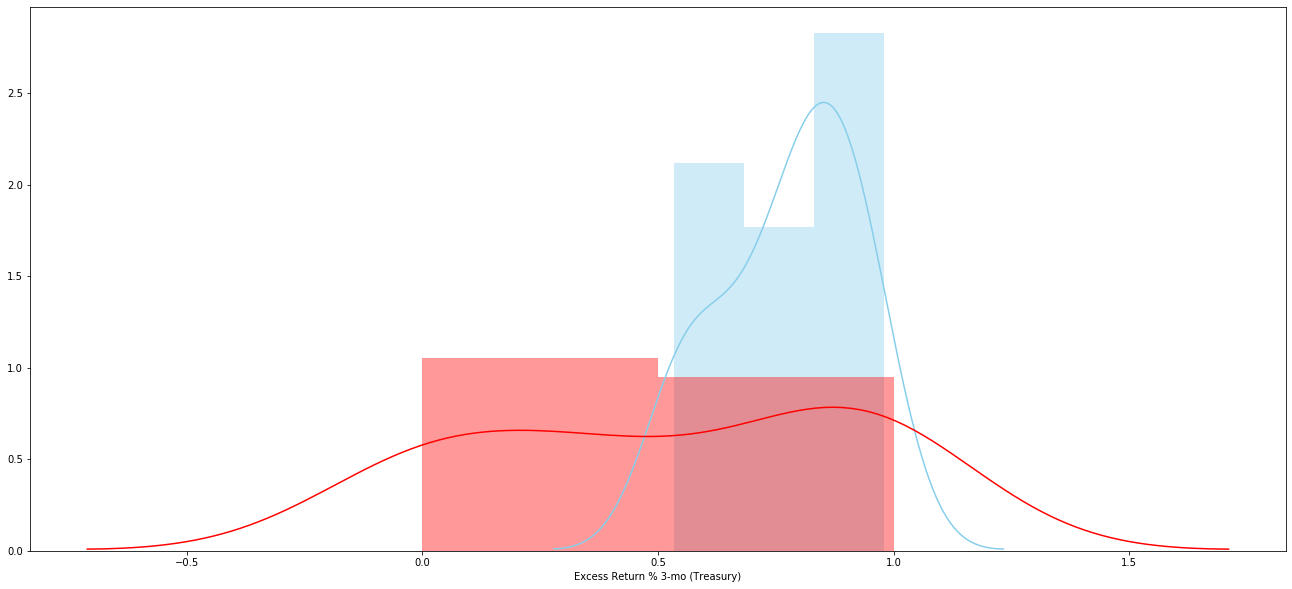

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 3-mo (Agg)  19.0  0.453245  0.353465  0.081091   0.282880   
 2                    combined  38.0  0.615482  0.312830  0.050748   0.512657   
 
    Interval  
 0  0.846994  
 1  0.623610  
 2  0.718306  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.3245
 1                             Degrees of freedom =   36.0000
 2                                              t =    3.7066
 3                          Two side test p value =    0.0007
 4                         Difference < 0 p value =    0.9996
 5                         Difference > 0 p value =    0.0004
 6                                      Cohen's d =    1.2026
 7                                      Hedge's g =    1.1774
 8                                  Glass's delta =    

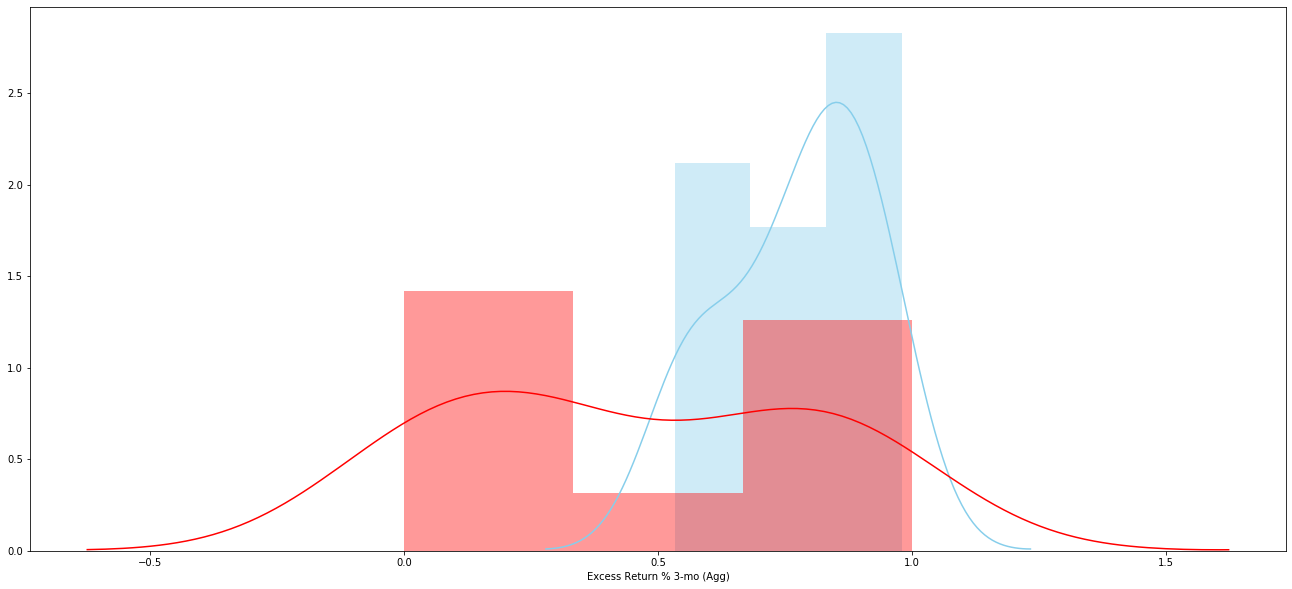

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 6-mo (Treasury)  19.0  0.509193  0.422367  0.096898   
 2                         combined  38.0  0.643456  0.339632  0.055096   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.305618  0.712767  
 2   0.531821  0.755090  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2685
 1                              Degrees of freedom =   36.0000
 2                                               t =    2.6235
 3                           Two side test p value =    0.0127
 4                          Difference < 0 p value =    0.9937
 5                          Difference > 0 p value =    0.0063
 6                                       Cohen's d =    0.8512
 7                                       Hedge's g =    0.8333
 8                        

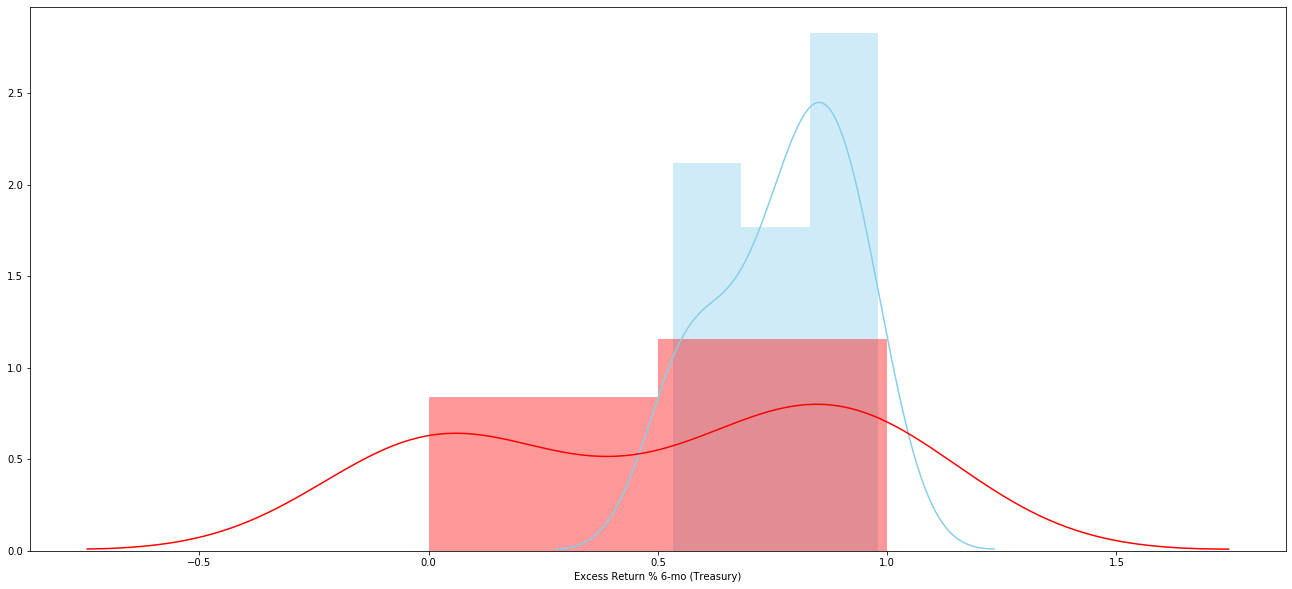

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 6-mo (Agg)  19.0  0.428580  0.373842  0.085765   0.248394   
 2                    combined  38.0  0.603149  0.330663  0.053641   0.494463   
 
    Interval  
 0  0.846994  
 1  0.608766  
 2  0.711836  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.3491
 1                             Degrees of freedom =   36.0000
 2                                              t =    3.7997
 3                          Two side test p value =    0.0005
 4                         Difference < 0 p value =    0.9997
 5                         Difference > 0 p value =    0.0003
 6                                      Cohen's d =    1.2328
 7                                      Hedge's g =    1.2069
 8                                  Glass's delta =    

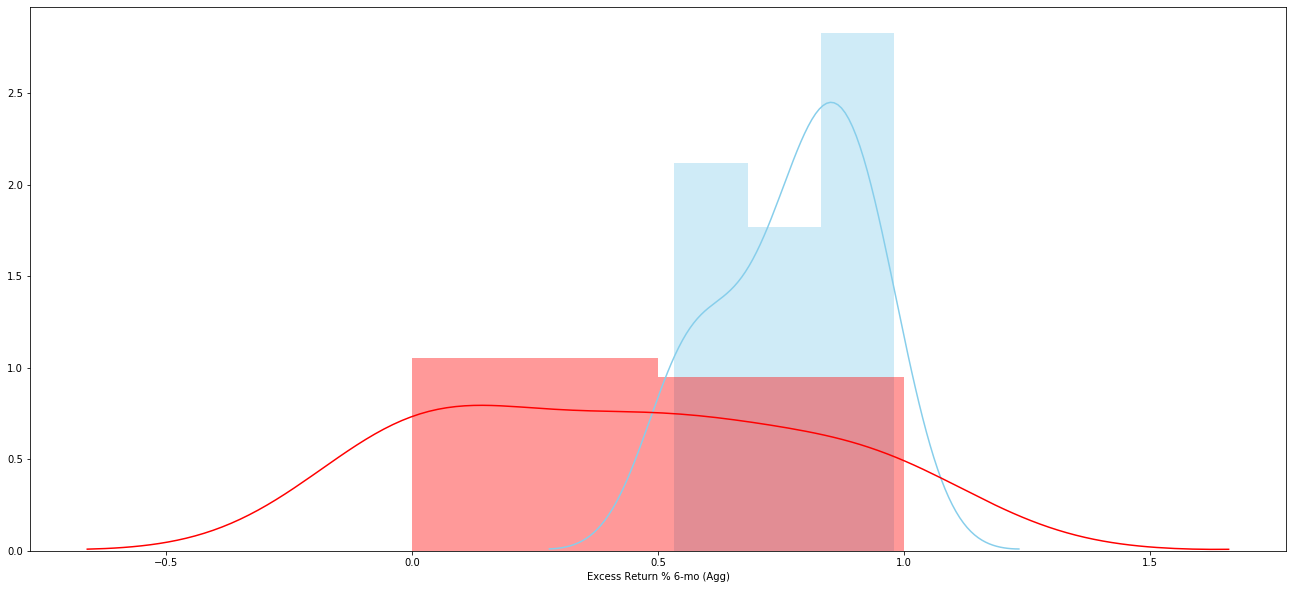

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 9-mo (Treasury)  19.0  0.516651  0.417323  0.095740   
 2                         combined  38.0  0.647185  0.335075  0.054356   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.315507  0.717794  
 2   0.537048  0.757321  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2611
 1                              Degrees of freedom =   36.0000
 2                                               t =    2.5782
 3                           Two side test p value =    0.0142
 4                          Difference < 0 p value =    0.9929
 5                          Difference > 0 p value =    0.0071
 6                                       Cohen's d =    0.8365
 7                                       Hedge's g =    0.8189
 8                        

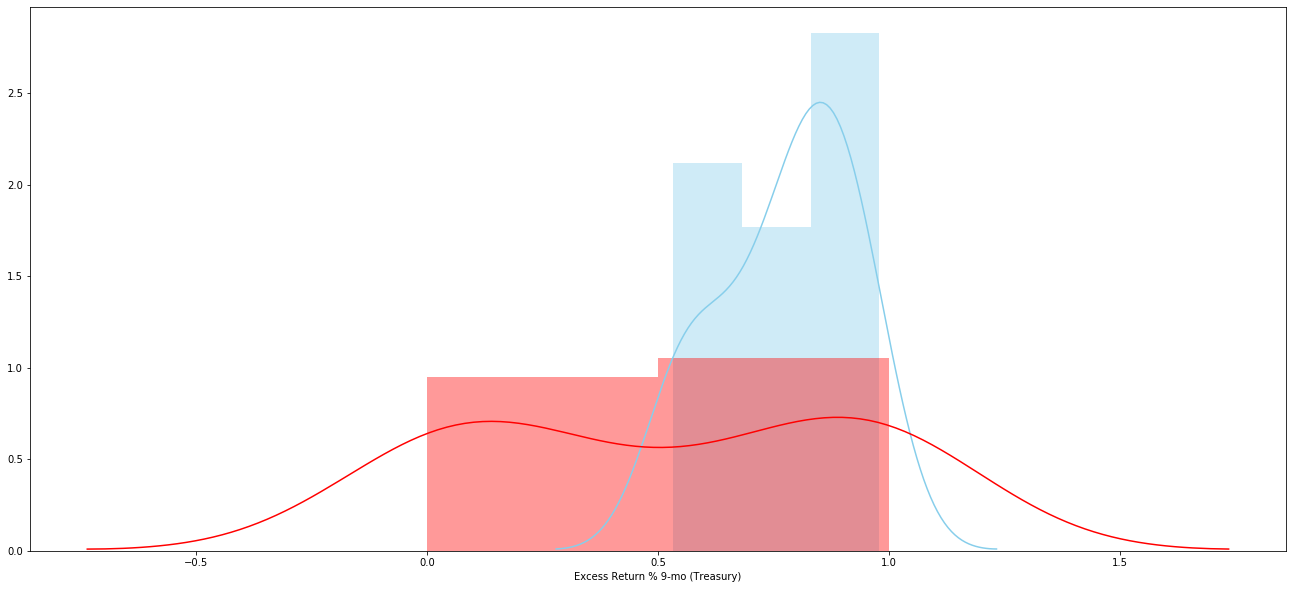

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 9-mo (Agg)  19.0  0.367488  0.331205  0.075984   0.207852   
 2                    combined  38.0  0.572603  0.326536  0.052971   0.465273   
 
    Interval  
 0  0.846994  
 1  0.527123  
 2  0.679933  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.4102
 1                             Degrees of freedom =   36.0000
 2                                              t =    4.9527
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.6069
 7                                      Hedge's g =    1.5732
 8                                  Glass's delta =    

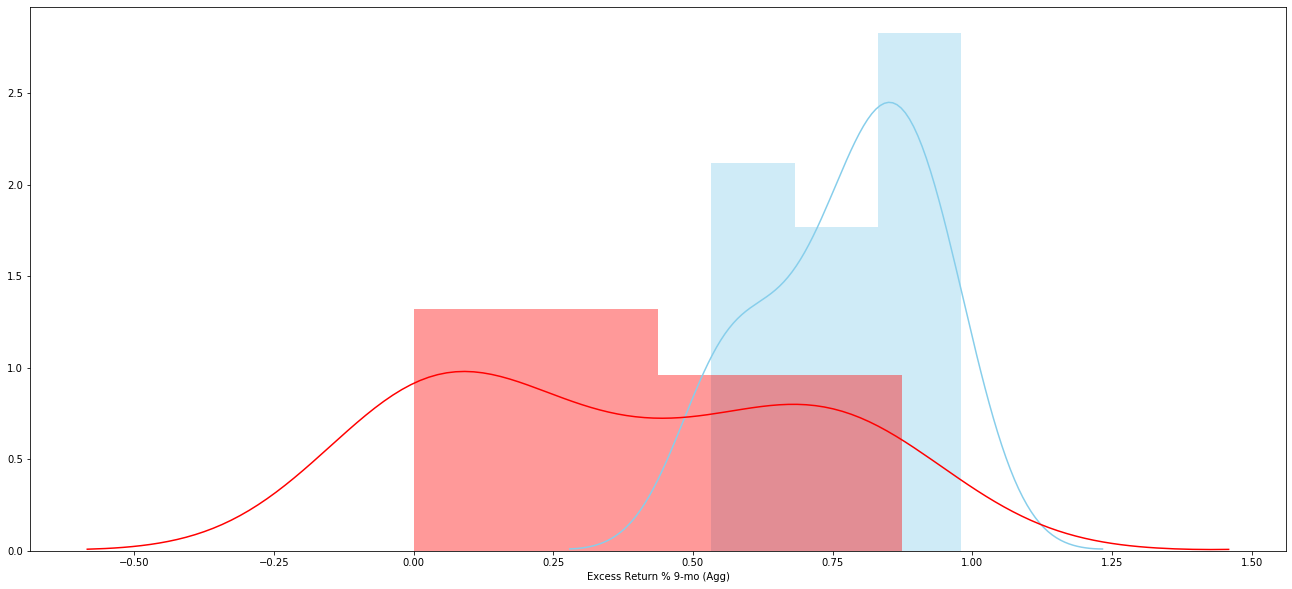

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 12-mo (Treasury)  19.0  0.615322  0.330498  0.075821   
 2                          combined  38.0  0.696520  0.264499  0.042907   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.456027  0.774617  
 2   0.609582  0.783459  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.1624
 1                              Degrees of freedom =   36.0000
 2                                               t =    1.9641
 3                           Two side test p value =    0.0573
 4                          Difference < 0 p value =    0.9714
 5                          Difference > 0 p value =    0.0286
 6                                       Cohen's d =    0.6372
 7                                       Hedge's g =    0.6239
 8                    

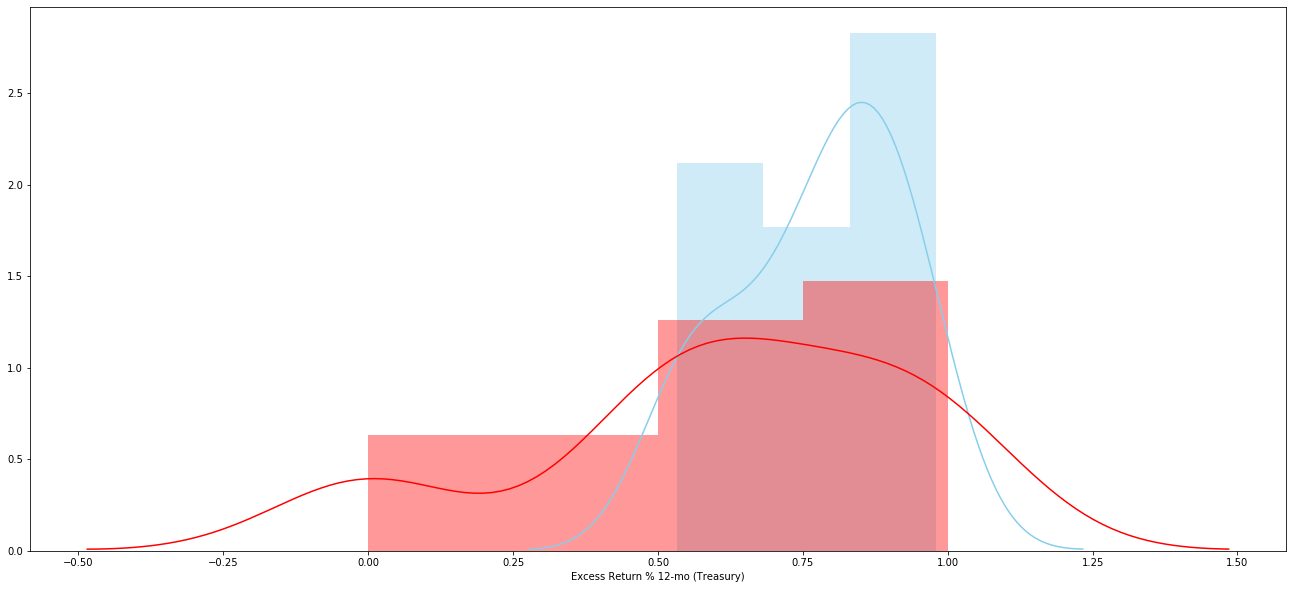

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 12-mo (Agg)  19.0  0.479375  0.333691  0.076554   0.318541   
 2                     combined  38.0  0.628547  0.295082  0.047869   0.531556   
 
    Interval  
 0  0.846994  
 1  0.640209  
 2  0.725538  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.2983
 1                              Degrees of freedom =   36.0000
 2                                               t =    3.5793
 3                           Two side test p value =    0.0010
 4                          Difference < 0 p value =    0.9995
 5                          Difference > 0 p value =    0.0005
 6                                       Cohen's d =    1.1613
 7                                       Hedge's g =    1.1369
 8                                   Glass

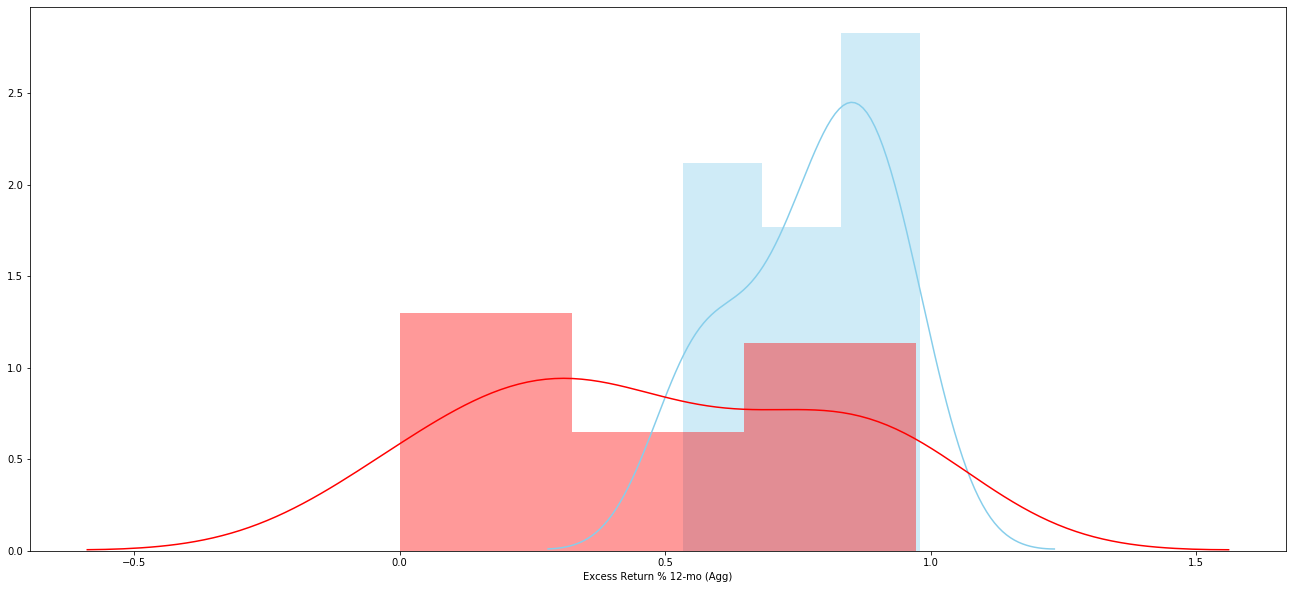

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 24-mo (Treasury)  19.0  0.771921  0.288486  0.066183   
 2                          combined  38.0  0.774820  0.224824  0.036471   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.632875  0.910966  
 2   0.700922  0.848717  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0058
 1                              Degrees of freedom =   36.0000
 2                                               t =    0.0784
 3                           Two side test p value =    0.9379
 4                          Difference < 0 p value =    0.5310
 5                          Difference > 0 p value =    0.4690
 6                                       Cohen's d =    0.0254
 7                                       Hedge's g =    0.0249
 8                    

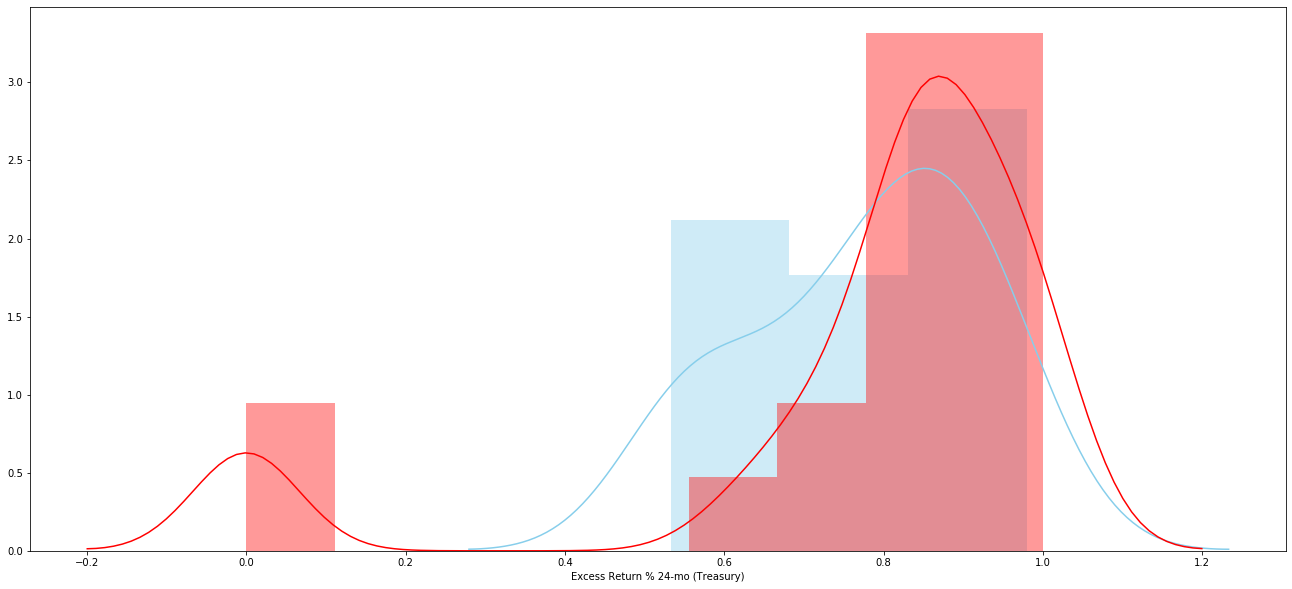

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 24-mo (Agg)  19.0  0.500154  0.187688  0.043059   0.409691   
 2                     combined  38.0  0.638936  0.216722  0.035157   0.567701   
 
    Interval  
 0  0.846994  
 1  0.590617  
 2  0.710171  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.2776
 1                              Degrees of freedom =   36.0000
 2                                               t =    5.1179
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6605
 7                                       Hedge's g =    1.6256
 8                                   Glass

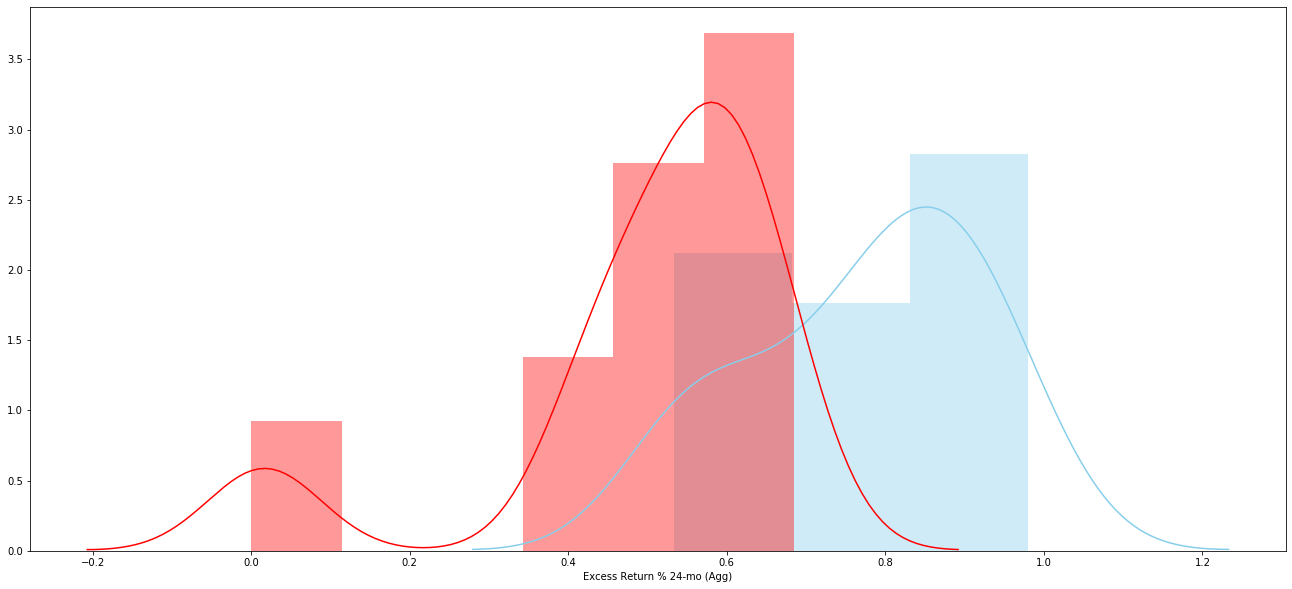

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 36-mo (Treasury)  19.0  0.768770  0.169998  0.039000   
 2                          combined  38.0  0.773244  0.155337  0.025199   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.686834  0.850707  
 2   0.722186  0.824302  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0089
 1                              Degrees of freedom =   36.0000
 2                                               t =    0.1752
 3                           Two side test p value =    0.8619
 4                          Difference < 0 p value =    0.5691
 5                          Difference > 0 p value =    0.4309
 6                                       Cohen's d =    0.0568
 7                                       Hedge's g =    0.0557
 8                    

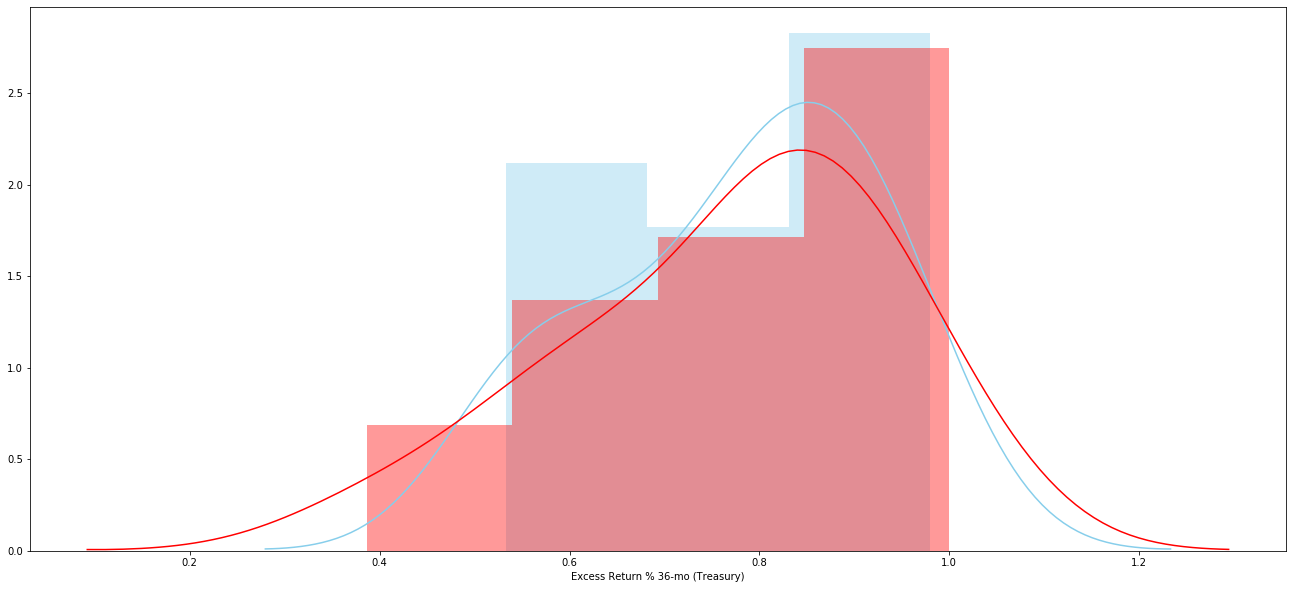

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 36-mo (Agg)  19.0  0.537184  0.076956  0.017655   0.500092   
 2                     combined  38.0  0.657451  0.166692  0.027041   0.602661   
 
    Interval  
 0  0.846994  
 1  0.574275  
 2  0.712241  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.2405
 1                              Degrees of freedom =   36.0000
 2                                               t =    6.4309
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    2.0865
 7                                       Hedge's g =    2.0427
 8                                   Glass

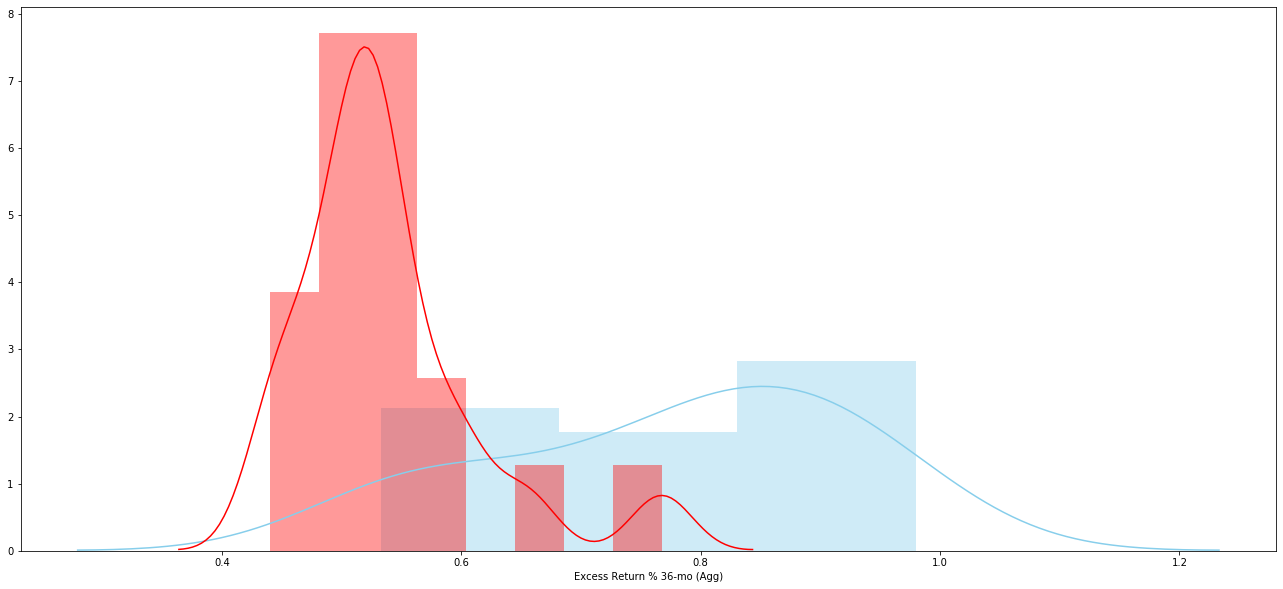

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_CMBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,267.000000,267.000000,267.000000,266.000000,266.000000,263.000000,263.000000,260.000000,260.000000,257.000000,257.000000,245.000000,245.000000,233.000000,233.000000,267.000000
mean,0.389551,0.497822,0.503905,0.508826,0.507331,0.502922,0.510516,0.503568,0.489132,0.511401,0.510328,0.513404,0.476935,0.502615,0.482371,2.528090
std,0.327368,0.255197,0.234098,0.260708,0.243181,0.274559,0.258519,0.283993,0.249247,0.276018,0.263561,0.296969,0.226476,0.312065,0.234052,1.062943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.129442,0.374333,0.376337,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.299492,0.494333,0.495460,0.510422,0.462486,0.493021,0.474618,0.501222,0.465767,0.519729,0.475128,0.491521,0.445444,0.483095,0.450922,3.000000
75%,0.472081,0.622111,0.625106,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 3-mo (Treasury)  266.0  0.508826  0.260708  0.015985   
 2                         combined  285.0  0.526752  0.263145  0.015587   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.477352  0.540300  
 2   0.496071  0.557433  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2689
 1                              Degrees of freedom =   283.0000
 2                                               t =     4.4428
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0550
 7                                       Hedge's g =     1.0522
 8           

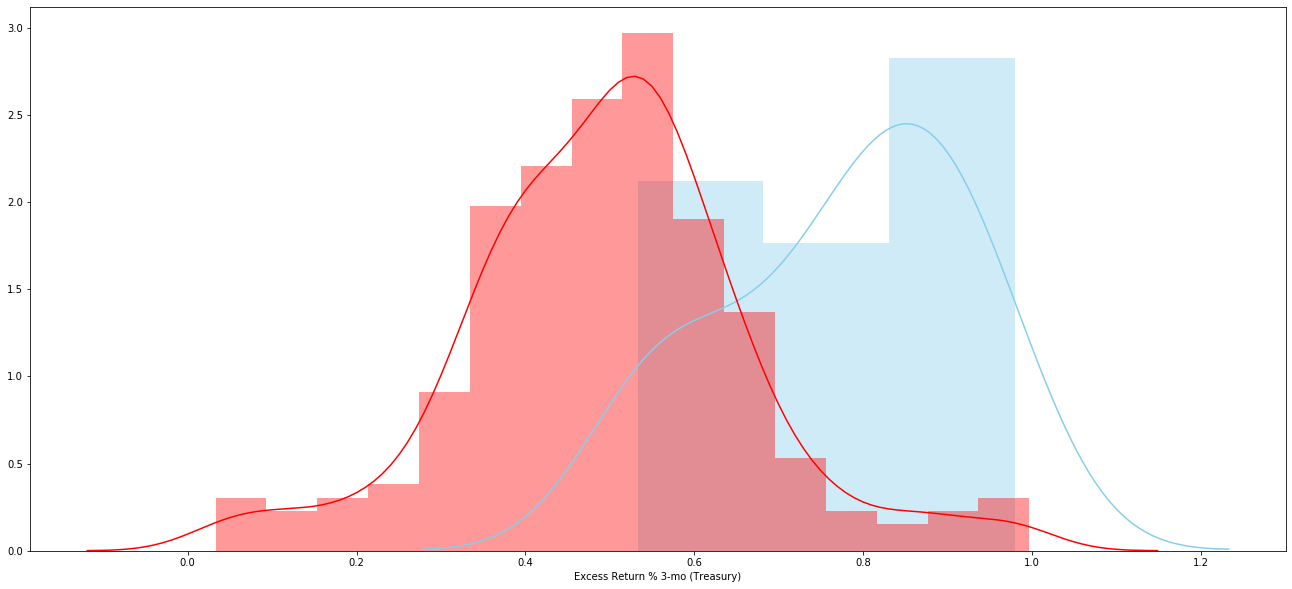

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 3-mo (Agg)  266.0  0.507331  0.243181  0.014910   0.477974   
 2                    combined  285.0  0.525357  0.247093  0.014637   0.496547   
 
    Interval  
 0  0.846994  
 1  0.536689  
 2  0.554167  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2704
 1                             Degrees of freedom =   283.0000
 2                                              t =     4.7822
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1356
 7                                      Hedge's g =     1.1326
 8                                  Glass'

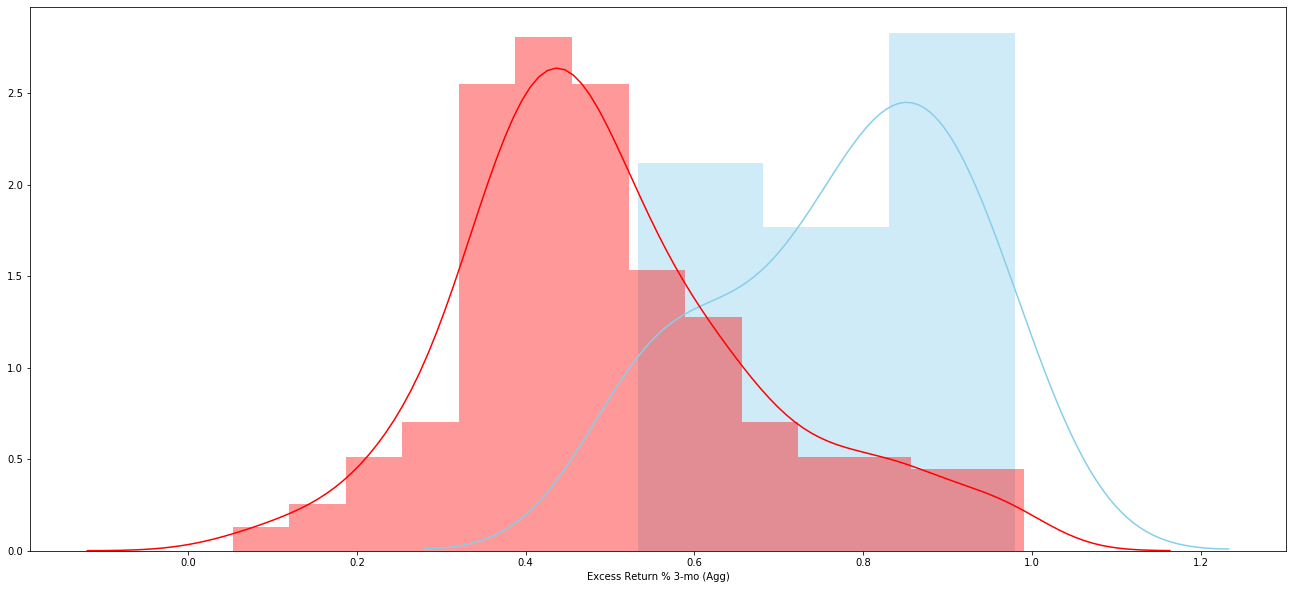

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 6-mo (Treasury)  263.0  0.502922  0.274559  0.016930   
 2                         combined  282.0  0.521436  0.276353  0.016457   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.469586  0.536258  
 2   0.489043  0.553830  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2748
 1                              Degrees of freedom =   280.0000
 2                                               t =     4.3150
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0251
 7                                       Hedge's g =     1.0223
 8           

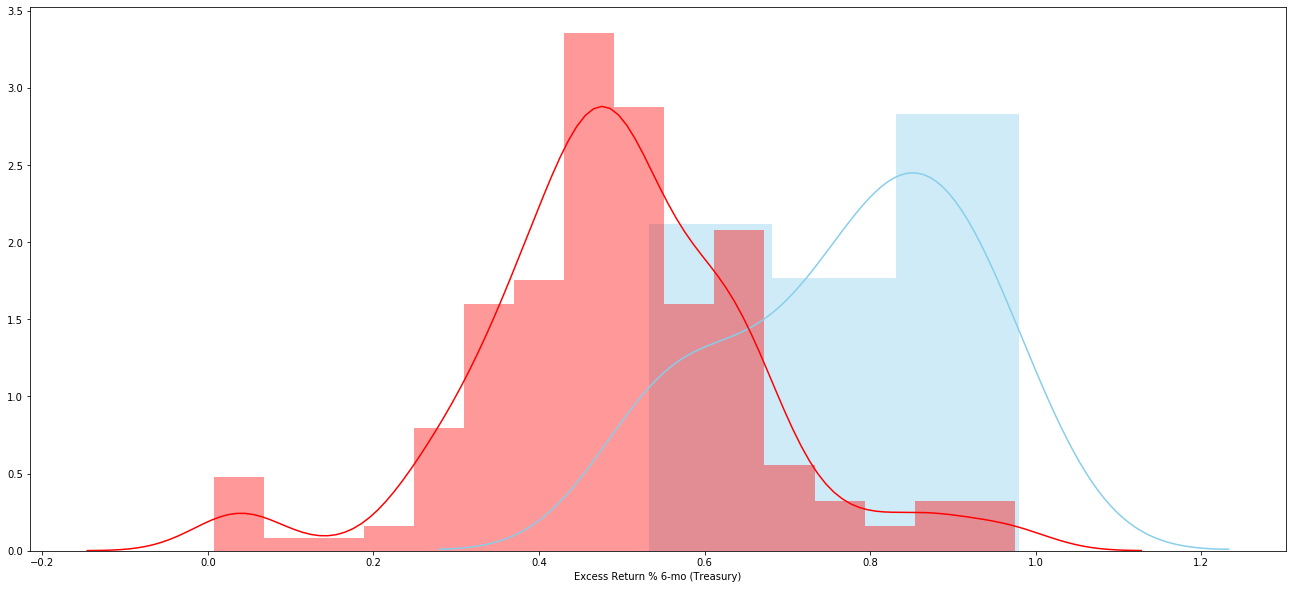

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 6-mo (Agg)  263.0  0.510516  0.258519  0.015941   0.479127   
 2                    combined  282.0  0.528519  0.261034  0.015544   0.497921   
 
    Interval  
 0  0.846994  
 1  0.541904  
 2  0.559117  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2672
 1                             Degrees of freedom =   280.0000
 2                                              t =     4.4509
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0573
 7                                      Hedge's g =     1.0545
 8                                  Glass'

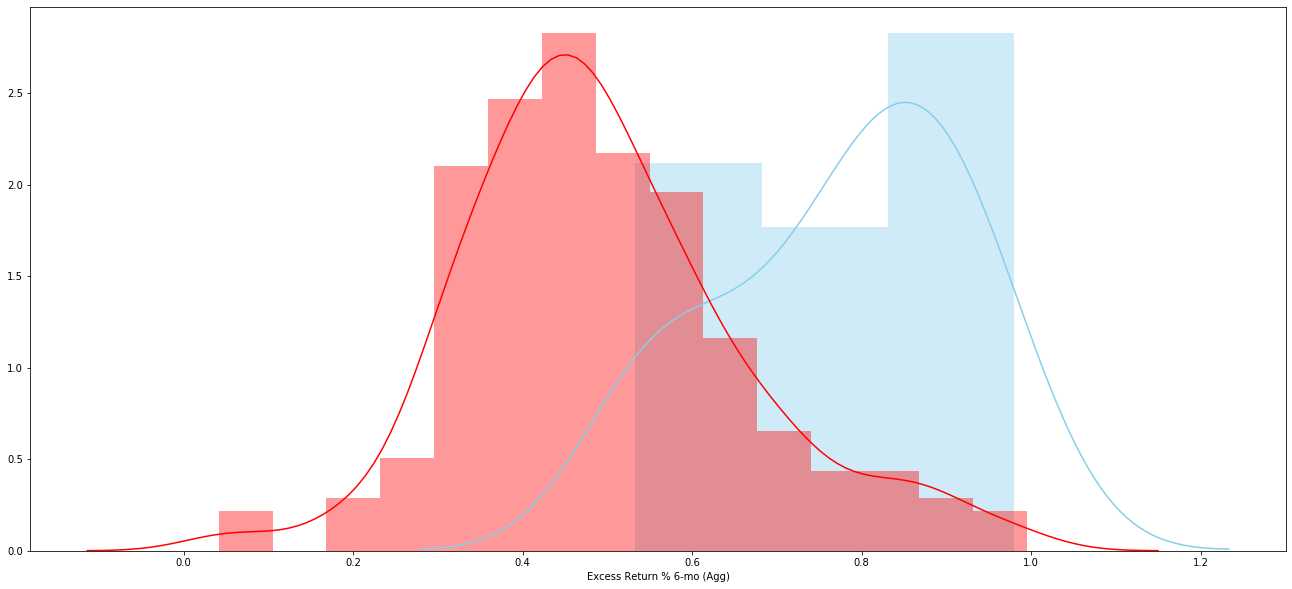

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 9-mo (Treasury)  260.0  0.503568  0.283993  0.017613   
 2                         combined  279.0  0.522238  0.285069  0.017067   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.468886  0.538250  
 2   0.488642  0.555834  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2742
 1                              Degrees of freedom =   277.0000
 2                                               t =     4.1639
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9896
 7                                       Hedge's g =     0.9869
 8           

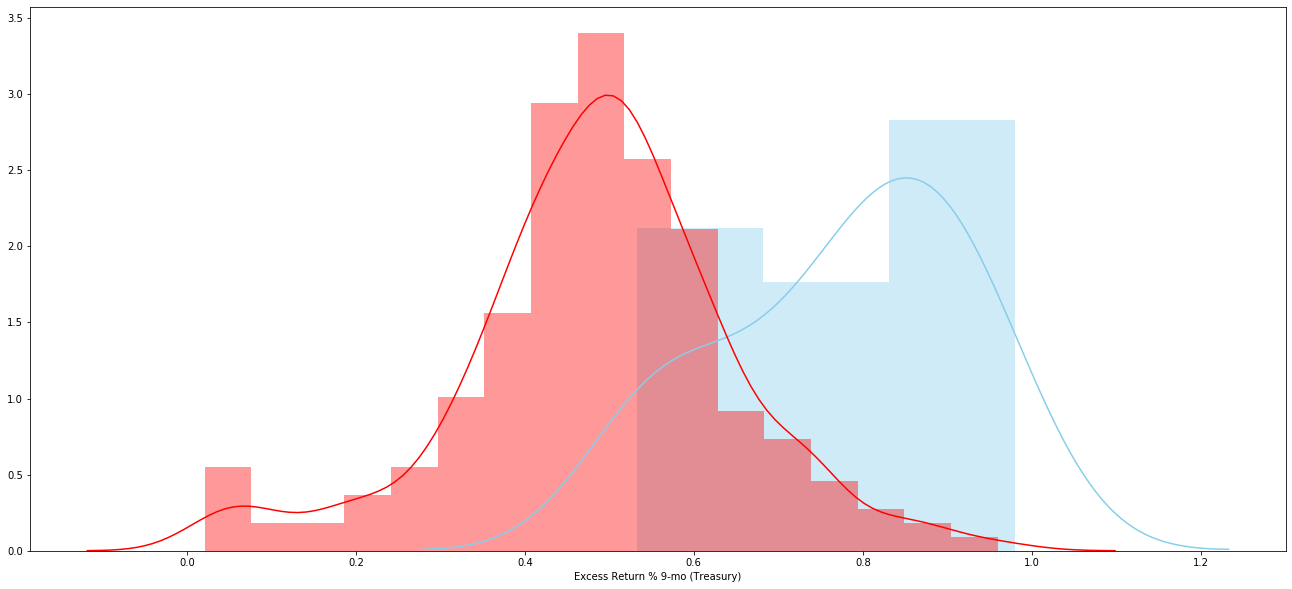

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   19.0  0.777718  0.143730  0.032974   0.708443   
 1  Excess Return % 9-mo (Agg)  260.0  0.489132  0.249247  0.015458   0.458693   
 2                    combined  279.0  0.508785  0.254008  0.015207   0.478849   
 
    Interval  
 0  0.846994  
 1  0.519570  
 2  0.538720  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2886
 1                             Degrees of freedom =   277.0000
 2                                              t =     4.9812
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1838
 7                                      Hedge's g =     1.1806
 8                                  Glass'

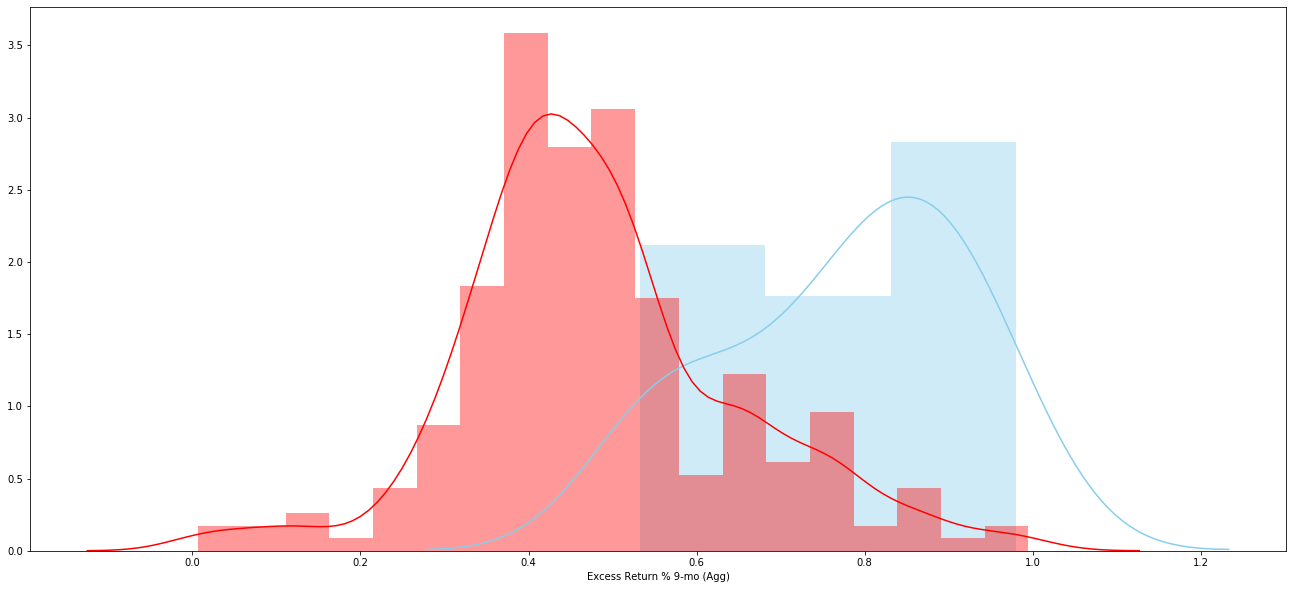

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 12-mo (Treasury)  257.0  0.511401  0.276018  0.017217   
 2                          combined  276.0  0.529734  0.277195  0.016685   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.477495  0.545307  
 2   0.496887  0.562581  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2663
 1                              Degrees of freedom =   274.0000
 2                                               t =     4.1592
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9888
 7                                       Hedge's g =     0.9861
 8       

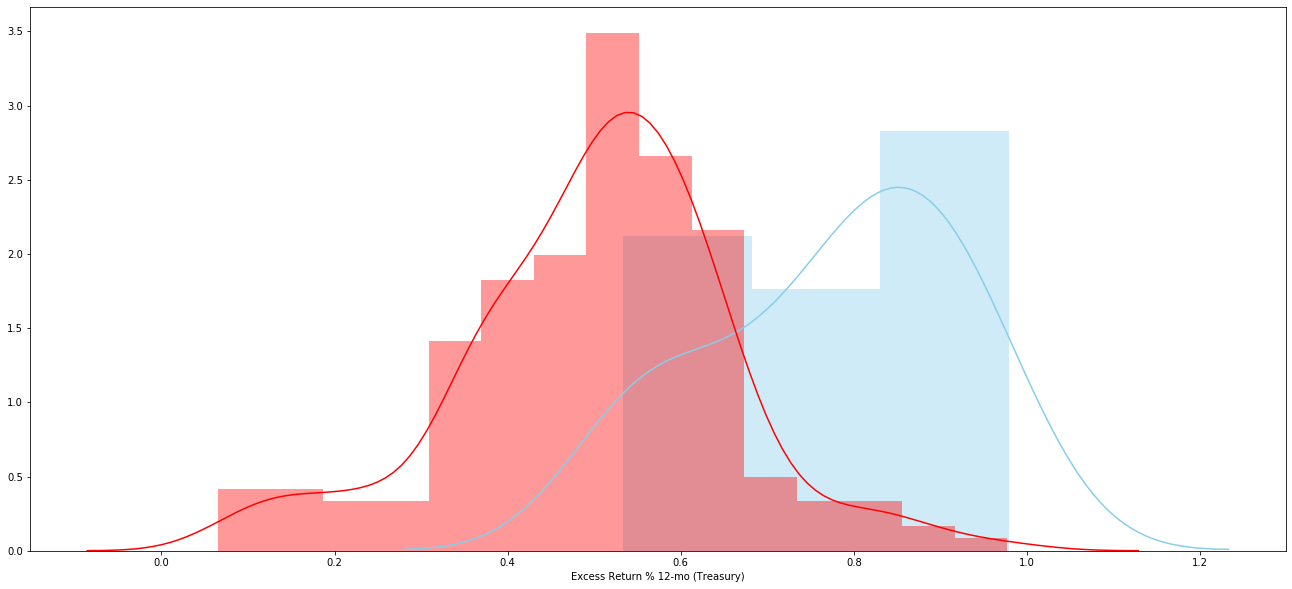

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 12-mo (Agg)  257.0  0.510328  0.263561  0.016440   
 2                     combined  276.0  0.528735  0.265738  0.015996   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.477952  0.542704  
 2   0.497246  0.560225  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2674
 1                              Degrees of freedom =   274.0000
 2                                               t =     4.3693
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0388
 7                                       Hedge's g =     1.0359
 8                           

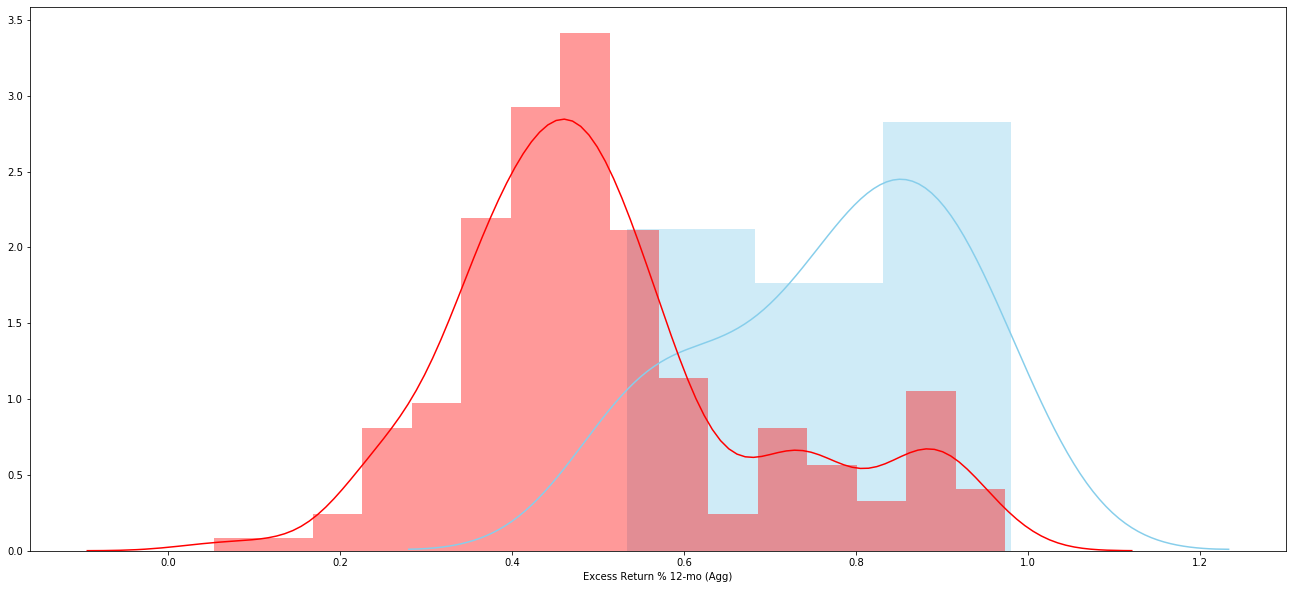

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 24-mo (Treasury)  245.0  0.513404  0.296969  0.018973   
 2                          combined  264.0  0.532427  0.296508  0.018249   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.476033  0.550775  
 2   0.496494  0.568359  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2643
 1                              Degrees of freedom =   262.0000
 2                                               t =     3.8397
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.9144
 7                                       Hedge's g =     0.9118
 8       

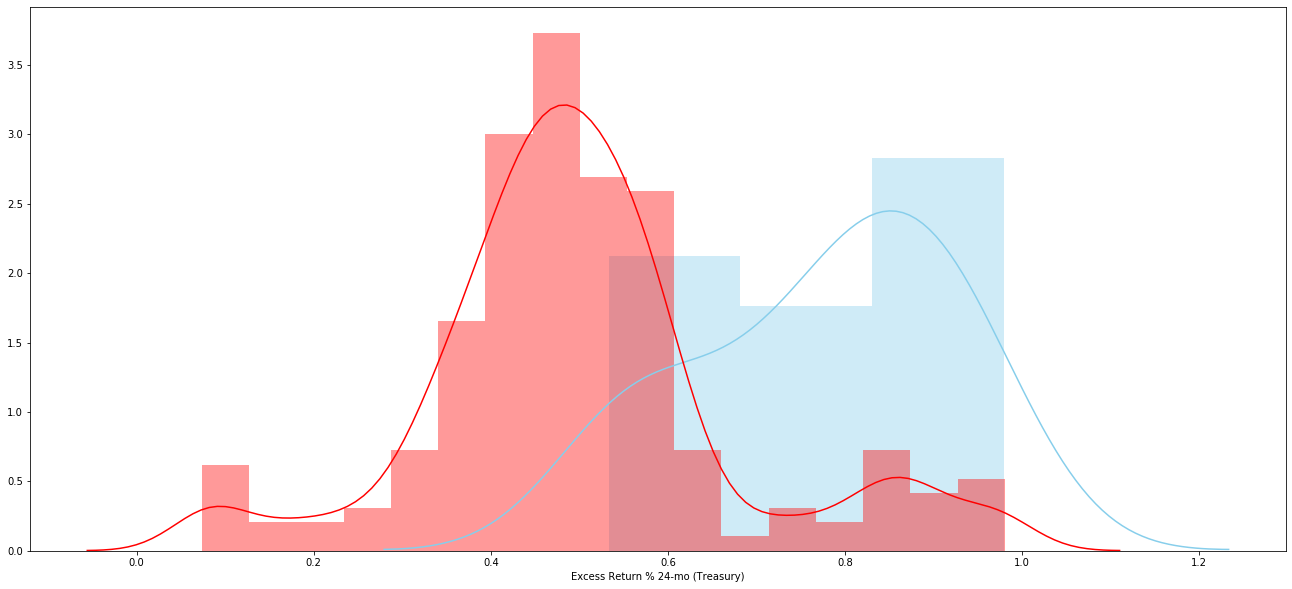

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 24-mo (Agg)  245.0  0.476935  0.226476  0.014469   
 2                     combined  264.0  0.498582  0.234660  0.014442   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.448434  0.505435  
 2   0.470145  0.527019  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3008
 1                              Degrees of freedom =   262.0000
 2                                               t =     5.6949
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3562
 7                                       Hedge's g =     1.3523
 8                           

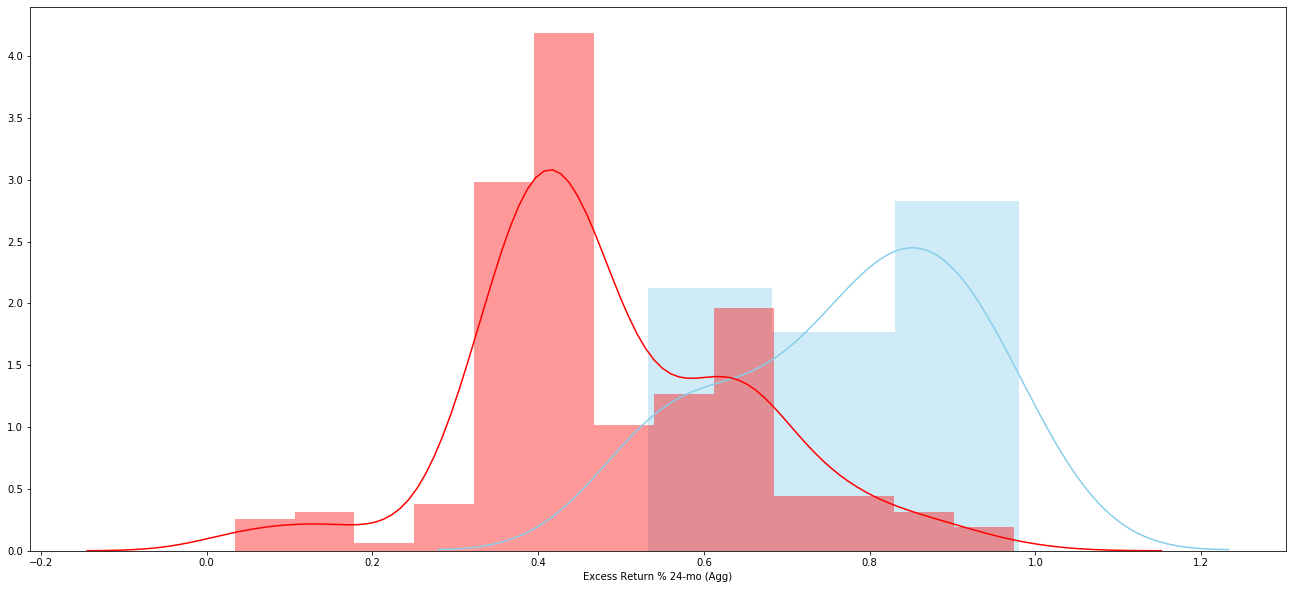

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 36-mo (Treasury)  233.0  0.502615  0.312065  0.020444   
 2                          combined  252.0  0.523357  0.311113  0.019598   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.462335  0.542895  
 2   0.484759  0.561955  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2751
 1                              Degrees of freedom =   250.0000
 2                                               t =     3.8044
 3                           Two side test p value =     0.0002
 4                          Difference < 0 p value =     0.9999
 5                          Difference > 0 p value =     0.0001
 6                                       Cohen's d =     0.9077
 7                                       Hedge's g =     0.9050
 8       

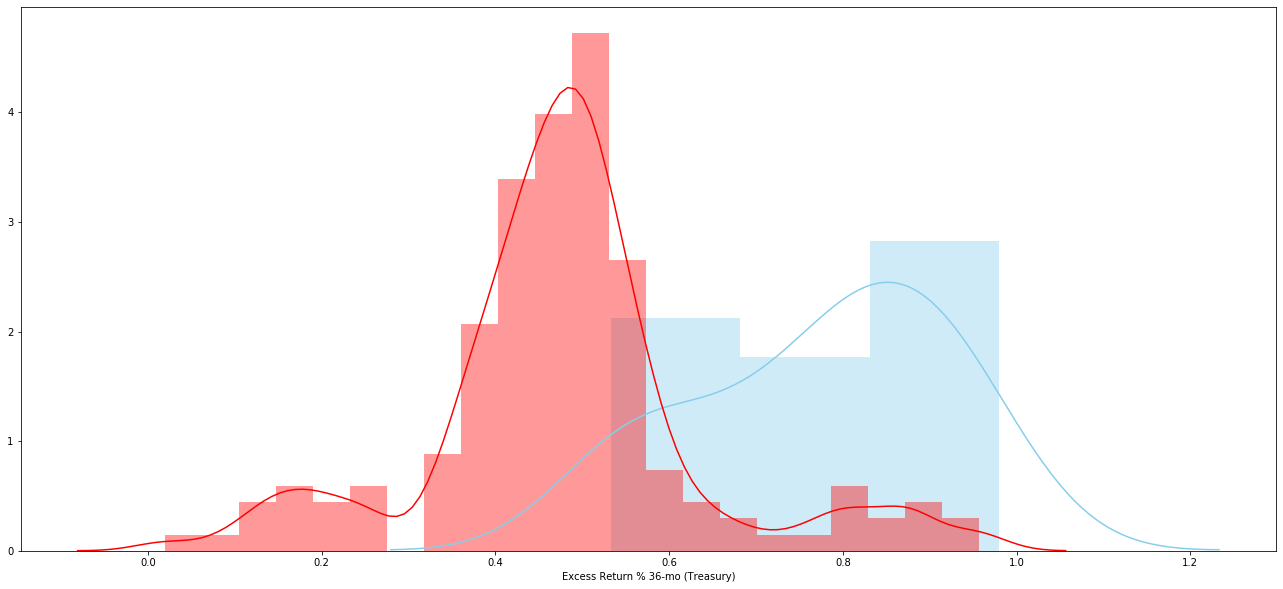

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   19.0  0.777718  0.143730  0.032974   
 1  Excess Return % 36-mo (Agg)  233.0  0.482371  0.234052  0.015333   
 2                     combined  252.0  0.504639  0.241289  0.015200   
 
    95% Conf.  Interval  
 0   0.708443  0.846994  
 1   0.452161  0.512581  
 2   0.474704  0.534575  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2953
 1                              Degrees of freedom =   250.0000
 2                                               t =     5.4118
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2912
 7                                       Hedge's g =     1.2873
 8                           

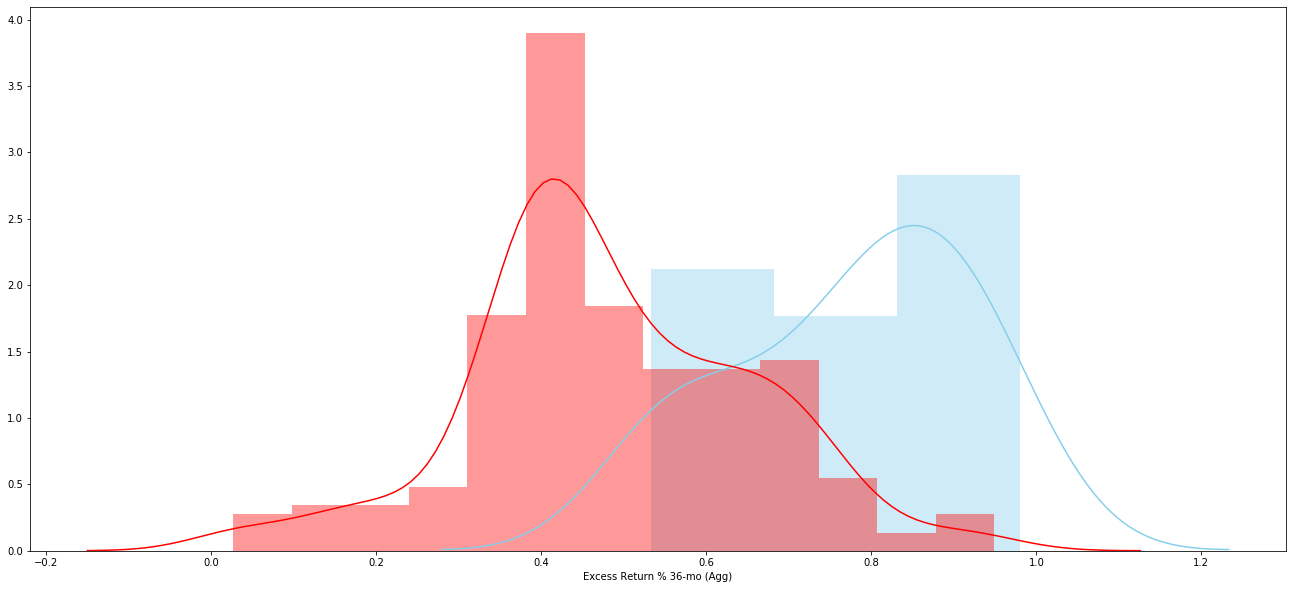

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")